# 02456 Deep Learning – Group 27  
## NumPy FFNN: Main Results Notebook

This notebook reproduces the main experiments from the report:

- Best configuration on **Fashion-MNIST** (train + validation metrics).
- One configuration on **CIFAR-10**.
- Confusion matrix for the best model.

In [ ]:
import sys
import pathlib

PROJECT_ROOT = pathlib.Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import numpy as np
import matplotlib.pyplot as plt

import src.data_loaders as data_loaders
from src.train import train
from src.activations import softmax
from src.utils import train_val_split
from sklearn.metrics import confusion_matrix


In [30]:
def plot_confusion_matrix(cm, class_names, title="Confusion matrix"):
    fig, ax = plt.subplots(figsize=(5, 5))
    im = ax.imshow(cm, interpolation="nearest")
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(len(class_names)),
        yticks=np.arange(len(class_names)),
        xticklabels=class_names,
        yticklabels=class_names,
        title=title,
        ylabel="True label",
        xlabel="Predicted label",
    )
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.tight_layout()
    plt.show()


In [31]:
# Fashion-MNIST
X_train, y_train, X_val, y_val, X_test, y_test = data_loaders.load_fashion_mnist(val_ratio=0.3, seed=42)
print("Fashion-MNIST shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_val:", y_test.shape)



Fashion-MNIST shapes:
X_train: (39200, 784) y_train: (39200,)
X_val: (16800, 784) y_val: (16800,)
X_test: (14000, 784) y_val: (14000,)


In [ ]:
config_fashion_best = {
    "hidden": [256, 128],
    "activations": ["relu", "relu"],
    "optimizer": "adam",
    "lr": 1e-3,
    "batch_size": 128,
    "epochs": 15,         
    "l2": 1e-4,
    "weight_init": "he",
    "seed": 42,
    "wandb_project": None  
}

net_fashion = train(X_train, y_train, X_val, y_val, X_test, y_test, config_fashion_best)


epoch 000 | train_acc=0.847 val_acc=0.833 train_loss=0.437 val_loss=0.462
epoch 001 | train_acc=0.871 val_acc=0.859 train_loss=0.364 val_loss=0.402
epoch 002 | train_acc=0.878 val_acc=0.861 train_loss=0.335 val_loss=0.384
epoch 003 | train_acc=0.897 val_acc=0.877 train_loss=0.288 val_loss=0.337
epoch 004 | train_acc=0.892 val_acc=0.874 train_loss=0.293 val_loss=0.349
epoch 005 | train_acc=0.900 val_acc=0.878 train_loss=0.266 val_loss=0.330
epoch 006 | train_acc=0.908 val_acc=0.880 train_loss=0.252 val_loss=0.327
epoch 007 | train_acc=0.906 val_acc=0.879 train_loss=0.257 val_loss=0.337
epoch 008 | train_acc=0.891 val_acc=0.863 train_loss=0.281 val_loss=0.366
epoch 009 | train_acc=0.919 val_acc=0.886 train_loss=0.221 val_loss=0.322
epoch 010 | train_acc=0.913 val_acc=0.878 train_loss=0.233 val_loss=0.340
epoch 011 | train_acc=0.922 val_acc=0.886 train_loss=0.212 val_loss=0.316
epoch 012 | train_acc=0.925 val_acc=0.888 train_loss=0.201 val_loss=0.318
epoch 013 | train_acc=0.918 val_acc=0.

In [ ]:
logits_test = net_fashion.forward(X_test)
probs_test = softmax(logits_test)
y_pred_test = probs_test.argmax(axis=1)

acc_test = (y_pred_test == y_test).mean()
print(f"Test accuracy (Fashion-MNIST) = {acc_test:.3f}")

cm_fashion = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix shape:", cm_fashion.shape)

Test accuracy (Fashion-MNIST) = 0.884
Confusion matrix shape: (10, 10)


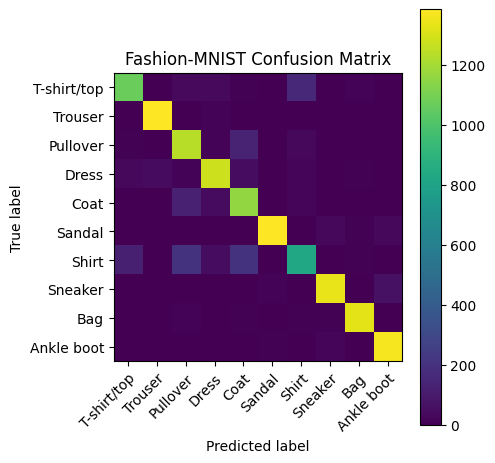

In [34]:
fashion_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plot_confusion_matrix(cm_fashion, fashion_classes, title="Fashion-MNIST Confusion Matrix")

In [35]:
# CIFAR-10
X_train, y_train, X_val, y_val, X_test, y_test = data_loaders.load_cifar10(val_ratio=0.3, seed=42)
print("CIFAR-10 shapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_val:", y_test.shape)

CIFAR-10 shapes:
X_train: (33600, 1024) y_train: (33600,)
X_val: (14400, 1024) y_val: (14400,)
X_test: (12000, 1024) y_val: (12000,)


In [ ]:
config_cifar = {
    "hidden": [512, 512],
    "activations": ["tanh","tanh"],
    "optimizer": "adam",
    "lr": 1e-3,
    "batch_size": 128,
    "epochs": 15,       
    "l2": 1e-4,
    "weight_init": "he",
    "seed": 42,
    "dropout": 0.1,
    "wandb_project": None
}

net_cifar = train(X_train, y_train, X_val, y_val, X_test, y_test, config_cifar)

epoch 000 | train_acc=0.389 val_acc=0.378 train_loss=1.726 val_loss=1.743
epoch 001 | train_acc=0.396 val_acc=0.390 train_loss=1.690 val_loss=1.716
epoch 002 | train_acc=0.428 val_acc=0.415 train_loss=1.599 val_loss=1.642
epoch 003 | train_acc=0.403 val_acc=0.379 train_loss=1.728 val_loss=1.785
epoch 004 | train_acc=0.455 val_acc=0.427 train_loss=1.523 val_loss=1.594
epoch 005 | train_acc=0.473 val_acc=0.441 train_loss=1.486 val_loss=1.562
epoch 006 | train_acc=0.461 val_acc=0.432 train_loss=1.498 val_loss=1.585
epoch 007 | train_acc=0.499 val_acc=0.467 train_loss=1.406 val_loss=1.508
epoch 008 | train_acc=0.508 val_acc=0.469 train_loss=1.388 val_loss=1.497
epoch 009 | train_acc=0.524 val_acc=0.483 train_loss=1.340 val_loss=1.456
epoch 010 | train_acc=0.515 val_acc=0.471 train_loss=1.365 val_loss=1.492
epoch 011 | train_acc=0.494 val_acc=0.450 train_loss=1.386 val_loss=1.527
epoch 012 | train_acc=0.543 val_acc=0.492 train_loss=1.288 val_loss=1.436
epoch 013 | train_acc=0.516 val_acc=0.

In [37]:
logits_test = net_cifar.forward(X_test)
probs_test = softmax(logits_test)
y_pred_test = probs_test.argmax(axis=1)

acc_test = (y_pred_test == y_test).mean()
print(f"Test accuracy (CIFAR-10) = {acc_test:.3f}")

cm_cifar = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix shape:", cm_cifar.shape)

Test accuracy (CIFAR-10) = 0.487
Confusion matrix shape: (10, 10)


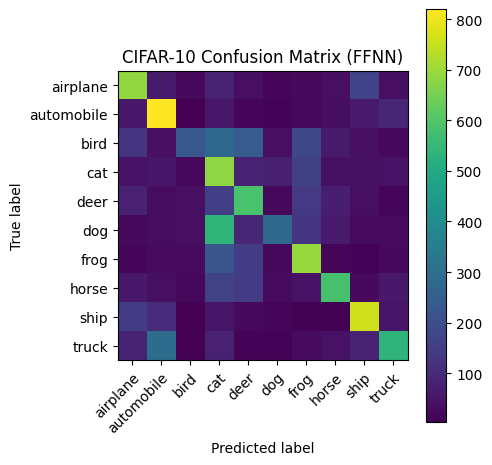

In [38]:
cifar_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plot_confusion_matrix(cm_cifar, cifar_classes, title="CIFAR-10 Confusion Matrix (FFNN)")

### Notes on Reproducing Report Results

In this notebook, we use a slightly smaller number of epochs (e.g. 15) 
to keep runtime manageable. The final results reported in the paper were 
obtained by running the same configurations for more epochs via the 
command-line interface:

```bash
python -m src.run_experiment --dataset fashion ...
python -m src.run_experiment --dataset cifar ...
